In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rutas a las carpetas de entrenamiento y prueba
train_dir = './train'
test_dir = './test'

# Parámetros de preprocesamiento y generación de imágenes
image_size = (64, 64)
batch_size = 32

# Generador de datos de entrenamiento
train_datagen = ImageDataGenerator(rescale=1./255)
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Generador de datos de prueba
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Crear el modelo de CNN
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(train_data.num_classes, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(train_data, epochs=10)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_data)
print("Precisión en el conjunto de prueba:", test_accuracy)



Found 1633 images belonging to 8 classes.
Found 810 images belonging to 8 classes.
Epoch 1/10
52/52 [==============================] - 13s 237ms/step - loss: 1.2571 - accuracy: 0.6338
Epoch 2/10
52/52 [==============================] - 6s 118ms/step - loss: 0.4431 - accuracy: 0.8396
Epoch 3/10
52/52 [==============================] - 6s 118ms/step - loss: 0.2359 - accuracy: 0.9228
Epoch 4/10
52/52 [==============================] - 6s 118ms/step - loss: 0.1086 - accuracy: 0.9798
Epoch 5/10
52/52 [==============================] - 6s 117ms/step - loss: 0.0695 - accuracy: 0.9890
Epoch 6/10
52/52 [==============================] - 6s 119ms/step - loss: 0.0404 - accuracy: 0.9982
Epoch 7/10
52/52 [==============================] - 6s 119ms/step - loss: 0.0185 - accuracy: 1.0000
Epoch 8/10
52/52 [==============================] - 6s 117ms/step - loss: 0.0141 - accuracy: 1.0000
Epoch 9/10
52/52 [==============================] - 6s 118ms/step - loss: 0.0090 - accuracy: 1.0000
Epoch 10/10
26/2

In [2]:
from sklearn.metrics import confusion_matrix

# Obtener las predicciones en el conjunto de entrenamiento
train_predictions = model.predict(train_data)
train_labels = train_data.classes
train_cm = confusion_matrix(train_labels, np.argmax(train_predictions, axis=1))

# Obtener las predicciones en el conjunto de prueba
test_predictions = model.predict(test_data)
test_labels = test_data.classes
test_cm = confusion_matrix(test_labels, np.argmax(test_predictions, axis=1))

print("Matriz de confusión en el conjunto de entrenamiento:")
print(train_cm)
print()

print("Matriz de confusión en el conjunto de prueba:")
print(test_cm)

26/26 [==============================] - 2s 92ms/step
Matriz de confusión en el conjunto de entrenamiento:
[[  1   6   4  37   1  13   0]
 [  9  31  18 124   3  22   6]
 [  4  17   3  64   1  10   6]
 [ 34 122  70 553  23 113  34]
 [  3   4   1  21   2   5   1]
 [  9  27   7 111   6  31  13]
 [  2   6   2  39   1  10   3]]

Matriz de confusión en el conjunto de prueba:
[[  0   0   0   0   0   0   1   0]
 [  0  21   0  21   2   0   4   0]
 [  0   0  73   0  12   1  11   0]
 [  0   1   1  40   1   0   2   0]
 [  0   1   5   0 446   0   1   6]
 [  0   1   0   0   2  16   0   0]
 [  0   0   9   0   9   0  96   0]
 [  0   0   0   0  10   0   0  17]]


1/1 [==============================] - 0s 18ms/step


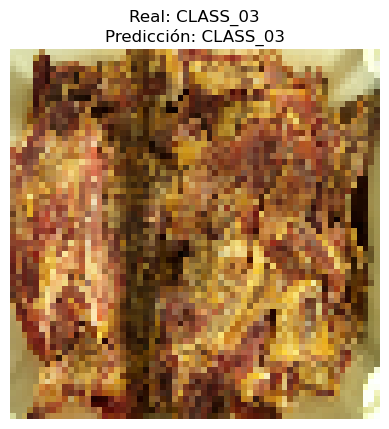

In [20]:
from tensorflow.keras.preprocessing.image import load_img

# Ruta de la imagen de prueba
test_image_path = './test/CLASS_03/14-CAPTURE_20220427_143242_902.png'

# Leer la imagen de prueba
test_image = load_img(test_image_path, target_size=image_size)

# Preparar la imagen para la predicción
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0  # Normalizar los valores de píxeles entre 0 y 1

# Obtener la clase predicha por el modelo
predicted_label = model.predict(test_image).argmax(axis=1)[0]

# Obtener el nombre de la clase real y predicha
class_name_real = class_names[np.argmax(label)]
class_name_predicted = class_names[predicted_label]

# Mostrar la imagen original
plt.imshow(test_image[0])
plt.title("Real: {}\nPredicción: {}".format(class_name_real, class_name_predicted))
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 20ms/step


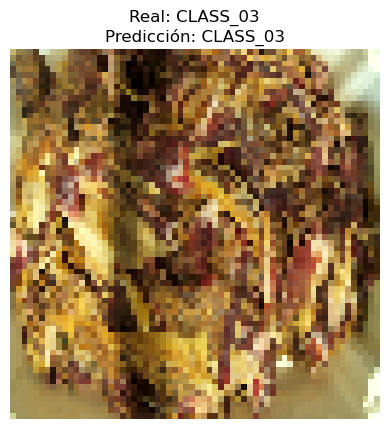

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Obtener el nombre de las clases
class_names = sorted(train_data.class_indices.keys())

# Obtener una imagen de prueba y su etiqueta
image, label = next(test_data)

# Obtener la clase predicha por el modelo
predicted_label = model.predict(image).argmax(axis=1)[0]

# Imprimir la imagen junto con su clase real y predicha
plt.imshow(image[0])
plt.title("Real: {}\nPredicción: {}".format(class_names[np.argmax(label)], class_names[predicted_label]))
plt.axis('off')
plt.show()